## Image Registeration using ORB

In [1]:
import cv2
import numpy as np

In [14]:
# Load the images
image1 = cv2.imread('image2.jpg')
image1 = cv2.resize(image1, (1280, 720))
image2 = cv2.imread('image1.jpg')
image2 = cv2.resize(image2, (1280, 720))

In [15]:
# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

In [16]:
# Find keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Initialize Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match keypoints
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)


In [17]:
# Retrieve matched keypoints
matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

# Estimate affine transformation
transformation_matrix, _ = cv2.estimateAffine2D(matched_keypoints1, matched_keypoints2)

# Apply transformation to image1
registered_image = cv2.warpAffine(image1, transformation_matrix, (image2.shape[1], image2.shape[0]))

# Display the registered image
cv2.imshow('Registered Image', registered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Perspective Transformation

In [10]:
import matplotlib.pyplot as plt
img = cv2.imread('image3.jpg')
img = cv2.resize(img, (1280, 720))

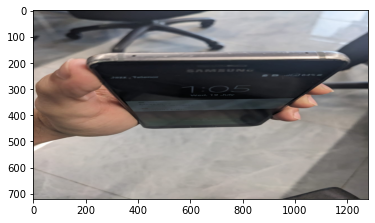

In [17]:
# Locate points of the documents
# or object which you want to transform
pts1 = np.float32([[268, 247], [1148, 240],
                   [433, 445], [860, 428]])
pts2 = np.float32([[300, 0], [1000, 0],
                   [300, 720], [1000, 720]])

# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, matrix, (1280, 720))
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)


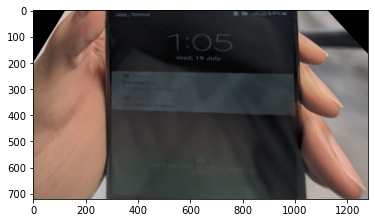

In [18]:
plt.imshow(RGB_img2)